In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv("scraped_df.csv")

In [54]:
df.head()

,Unnamed: 0,Reviews,sentiment,hugging_face_label
0,0,Disappointed. Surprisingly disappointed. I hav...,0.0,0
1,1,Food good but waiter should advise patrons on ...,0.0,0
2,2,Recently visited Ballygunge Place restaurant f...,1.0,1
3,3,I was very disapoint that they do not serve ge...,0.0,0
4,4,We visited 6 Ballygunge for a meal this Novemb...,1.0,1


In [55]:
df.drop(columns=['Unnamed: 0','hugging_face_label'],inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Reviews    679 non-null    object 
 1   sentiment  633 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB


In [57]:
df.isna().sum()

Reviews       0
sentiment    46
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df = df.reset_index(drop=True)


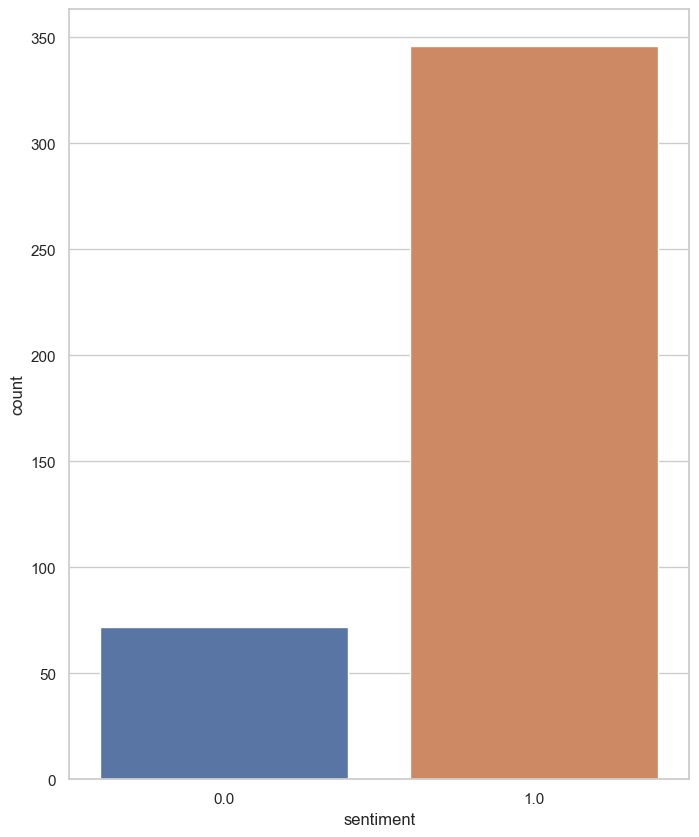

In [104]:
plt.figure(figsize=(8,10))
sns.countplot(x=df['sentiment'])
plt.show()

In [62]:
s=df['Reviews'][0]


In [63]:
s=s.lower()

In [64]:
s

'disappointed. surprisingly disappointed. i have eaten at the main restaurant a few times and the experience has been nice though the prices are a bit much. however a visit to their outlet at chowringhee was a disaster! to begin with when we reserved a table...more'

In [65]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lab11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
s=word_tokenize(s)

In [67]:
s

['disappointed',
 '.',
 'surprisingly',
 'disappointed',
 '.',
 'i',
 'have',
 'eaten',
 'at',
 'the',
 'main',
 'restaurant',
 'a',
 'few',
 'times',
 'and',
 'the',
 'experience',
 'has',
 'been',
 'nice',
 'though',
 'the',
 'prices',
 'are',
 'a',
 'bit',
 'much',
 '.',
 'however',
 'a',
 'visit',
 'to',
 'their',
 'outlet',
 'at',
 'chowringhee',
 'was',
 'a',
 'disaster',
 '!',
 'to',
 'begin',
 'with',
 'when',
 'we',
 'reserved',
 'a',
 'table',
 '...',
 'more']

In [68]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lab11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
stopwords=set(stopwords.words("english"))

In [70]:
s=[ word for word in s if word not in stopwords ]


In [71]:
s=" ".join(s)
s



'disappointed . surprisingly disappointed . eaten main restaurant times experience nice though prices bit much . however visit outlet chowringhee disaster ! begin reserved table ...'

In [72]:
import re

In [73]:
patterns=r"[^a-zA-Z\s]"

In [74]:
cleaned_s=re.sub(patterns,"",s)

In [75]:
cleaned_s

'disappointed  surprisingly disappointed  eaten main restaurant times experience nice though prices bit much  however visit outlet chowringhee disaster  begin reserved table '

In [76]:
from nltk.stem import PorterStemmer ,SnowballStemmer,WordNetLemmatizer


In [77]:
stemmer=PorterStemmer()

In [78]:
temp=[]
s=cleaned_s.split()

In [79]:
s

['disappointed',
 'surprisingly',
 'disappointed',
 'eaten',
 'main',
 'restaurant',
 'times',
 'experience',
 'nice',
 'though',
 'prices',
 'bit',
 'much',
 'however',
 'visit',
 'outlet',
 'chowringhee',
 'disaster',
 'begin',
 'reserved',
 'table']

In [80]:
s=[stemmer.stem(word) for word in s]

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
cv=CountVectorizer()

In [83]:
cv.fit_transform(s).toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
def textPreprocessing(df):
    temp=[]
    for i in range(len(df)):
        s=df['Reviews'][i]
        s=s.lower() 
        s=word_tokenize(s)
        s=[ word for word in s if word not in stopwords ]
        s=" ".join(s)
        patterns=r"[^a-zA-Z\s]"
        cleaned_s=re.sub(patterns,"",s)
        s=cleaned_s.split()
        s=[stemmer.stem(word) for word in s]
        temp.append(" ".join(s))  
    temp=cv.fit_transform(temp).toarray()

    return temp
    

In [85]:
X=textPreprocessing(df)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [86]:
y=df['sentiment']
X.shape

(418, 1812)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 1812), (138, 1812), (280,), (138,))

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
model=MultinomialNB()

In [92]:
model.fit(X_train,y_train)

MultinomialNB()

In [93]:
y_pred=model.predict(X_test)

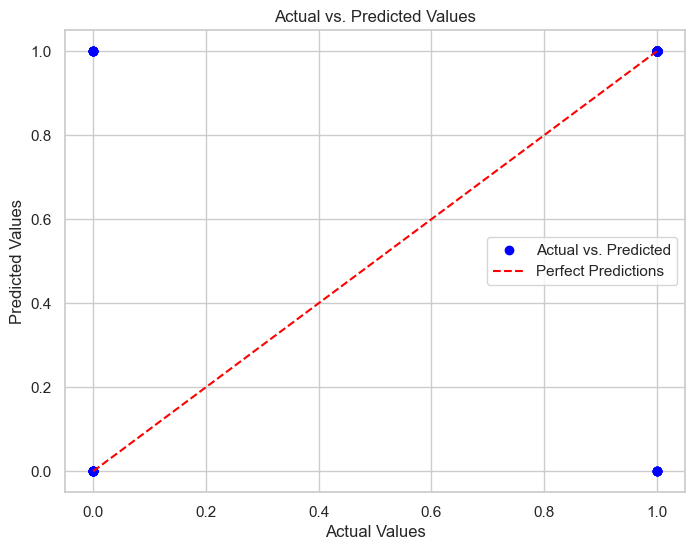

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.legend()

plt.show()

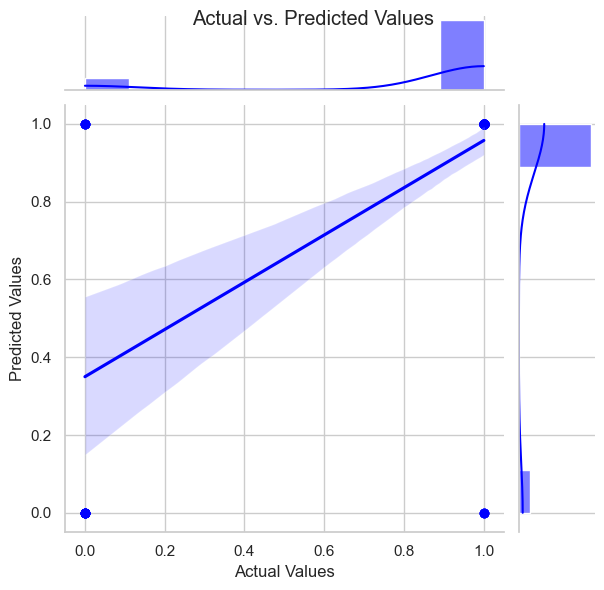

In [95]:
sns.set(style="whitegrid")
g = sns.jointplot(x=y_test, y=y_pred, kind="reg", color="blue")

g.set_axis_labels("Actual Values", "Predicted Values")
g.fig.suptitle('Actual vs. Predicted Values')

# Show the plot
plt.show()

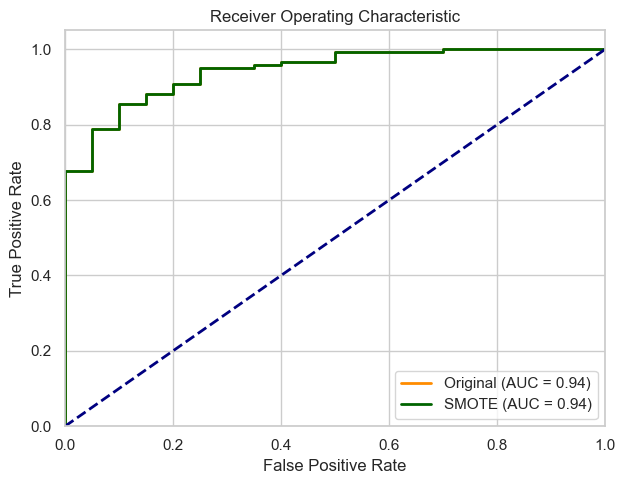

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
report_resampled = classification_report(y_test, y_pred)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

fpr_original, tpr_original, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_original = auc(fpr_original, tpr_original)

fpr_resampled, tpr_resampled, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

precision_original, recall_original, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
average_precision_original = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

precision_resampled, recall_resampled, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
average_precision_resampled = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label=f'Original (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_resampled, tpr_resampled, color='darkgreen', lw=2, label=f'SMOTE (AUC = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')


plt.tight_layout()
plt.show()


In [96]:
y_pred
df["Prediced"]=model.predict(X)
df.sample(10)

,Reviews,sentiment,Prediced
16,I have had good food there before. But I have ...,0.0,0.0
180,Amazing food with reasonable price. I went the...,1.0,1.0
152,"This is great. The food is hot,clean and tasty...",1.0,1.0
30,Its the best Restaurant for Chinese & Indian F...,1.0,1.0
313,"Excellent Service, the staff is very polite an...",1.0,1.0
144,Due to some unexpected turn of events ended up...,1.0,1.0
121,Had a great expectation about the Grand Market...,1.0,1.0
110,"Dear Guest, Namaste! Thank you for sharing you...",1.0,1.0
384,"Fairway has great pizza, the best! I am picky ...",1.0,1.0
337,Breakfast was delicious. Like a good homestyle...,1.0,1.0


In [97]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

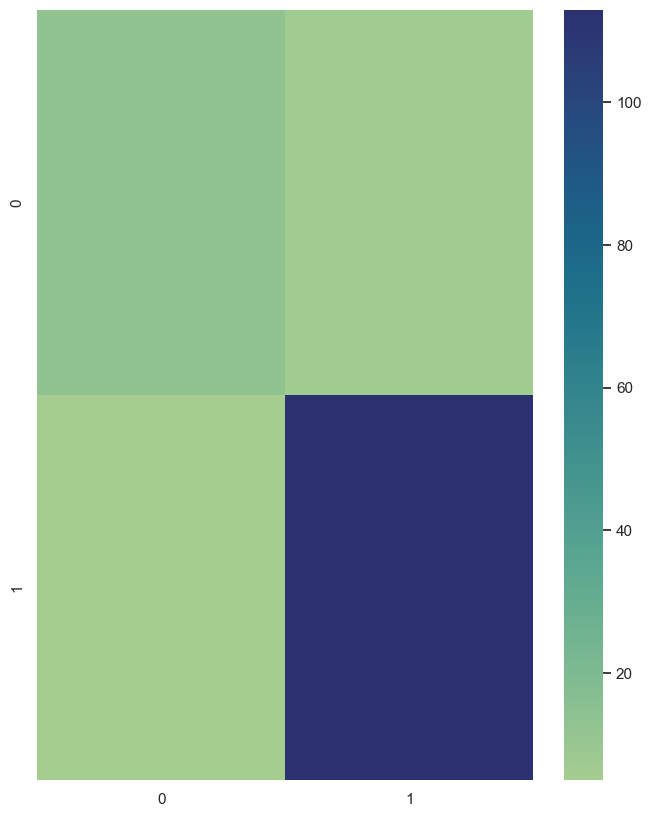

In [98]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,10))
sns.heatmap(cm,cmap='crest')
plt.show()

In [99]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9130434782608695


In [100]:
report=classification_report(y_test,y_pred,output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0.0,0.722222,0.650000,0.684211,20.000000
1.0,0.941667,0.957627,0.949580,118.000000
accuracy,0.913043,0.913043,0.913043,0.913043
macro avg,0.831944,0.803814,0.816895,138.000000
weighted avg,0.909863,0.913043,0.911121,138.000000


In [101]:
import joblib

In [102]:
joblib.dump(model,'Resturant_Review_SentimentAnalysis.pkl')

['Resturant_Review_SentimentAnalysis.pkl']